# POLI 175

## Class 05 - More Julia and More Regression

Dr. Umberto Mignozzetti

UCSD

# Julia

## Load CSV files

In [1]:
# Load packages
using Pkg; Pkg.add("LaTeXStrings"); Pkg.add("StatsPlots")
using CSV, DataFrames, Plots, GLM, StatsBase, Random, LaTeXStrings, StatsPlots

# Auxiliar function
function pairplot(df)
    _, cols = size(df)
    plots = []
    for row = 1:cols, col = 1:cols
        push!(
            plots,
            scatter(
                df[:, row],
                df[:, col],
                xtickfont = font(4),
                ytickfont = font(4),
                legend = false,
            ),
        )
    end
    plot(plots..., layout = (cols, cols))
end

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


pairplot (generic function with 1 method)

In [2]:
# Loading Prestige dataset
urldat = "https://raw.githubusercontent.com/umbertomig/POLI175julia/main/data/Duncan.csv"
dat = CSV.read(download(urldat), DataFrame)

Row,type,income,education,prestige,profession
,String7,Int64,Int64,Int64,String31
1,prof,62,86,82,accountant
2,prof,72,76,83,pilot
3,prof,75,92,90,architect
4,prof,55,90,76,author
5,prof,64,86,90,chemist
6,prof,21,84,87,minister
7,prof,64,93,93,professor
8,prof,80,100,90,dentist
9,wc,67,87,52,reporter


## Exploring

In [3]:
# Dataset dimension
size(dat)

(45, 5)

In [4]:
# Column names
names(dat)

5-element Vector{String}:
 "type"
 "income"
 "education"
 "prestige"
 "profession"

## Exploring

In [7]:
# Head
first(dat, 3)

Row,type,income,education,prestige,profession
,String7,Int64,Int64,Int64,String31
1,prof,62,86,82,accountant
2,prof,72,76,83,pilot
3,prof,75,92,90,architect


In [8]:
# Tail
last(dat, 3)

Row,type,income,education,prestige,profession
,String7,Int64,Int64,Int64,String31
1,bc,7,20,8,janitor
2,bc,34,47,41,policeman
3,bc,8,32,10,waiter


## Exploring

In [9]:
describe(dat)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,type,,bc,,wc,0,String7
2,income,41.8667,7,42.0,81,0,Int64
3,education,52.5556,7,45.0,100,0,Int64
4,prestige,47.6889,3,41.0,97,0,Int64
5,profession,,RR.engineer,,welfare.worker,0,String31


# Regression Analysis

# Regression

A few questions about `prestige`:

1. Is there a relationship between `prestige` and `income`?
1. How strong is the relationship between `prestige` and `income`?
1. Which variables are associated with `prestige`?
1. How can we accurately predict the prestige of professions not studied in this survey?
1. Is the relationship linear?
1. Is there a synergy among predictors?

## Simple Linear Regression

### Is there a relationship between `prestige` and `income`?

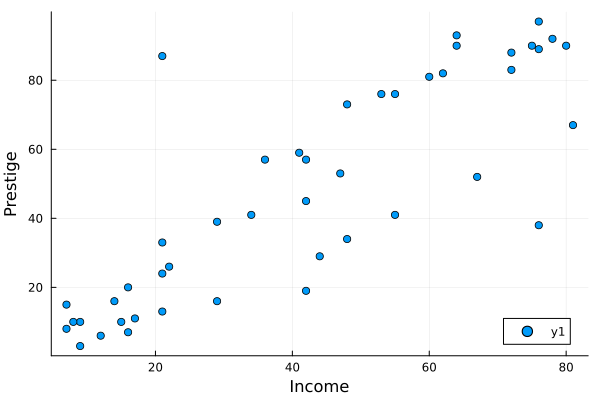

In [12]:
scatter(
    dat.income, dat.prestige,
    xlabel = "Income", ylabel = "Prestige",
    #series_annotations = text.(dat.profession, :bottom, 8),
    #legend = false
)

## Simple Linear Regression

### Is there a relationship between `prestige` and `income`?

$$ \widehat{prestige}_i = \widehat{\beta}_0 + \widehat{\beta}_1 income_i $$

In [15]:
mod = lm(@formula(prestige ~ income), dat)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

prestige ~ 1 + income

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  2.45657    5.19006    0.47    0.6384   -8.01018   12.9233
income       1.08039    0.107369  10.06    <1e-12    0.86386    1.29692
───────────────────────────────────────────────────────────────────────

Now, where to look to decide if there is a relationship between both?

## Simple Linear Regression

### Is there a relationship between `prestige` and `income`?

**Coefficient:** Is it statistically equal or different than zero?

I bet this sound silly... You may be thinking: "What do you mean? I see a 2.46 and a 1.08 there. They are different than zero."

Not true. Let me cook some data to show you.

In [17]:
# No relationship between X and Y
Random.seed!(12345)
df = DataFrame(x = randn(10), y = randn(10))
lm(@formula(y ~ x), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -0.251947    0.339996  -0.74    0.4799   -1.03598   0.532085
x            -0.642059    0.336388  -1.91    0.0927   -1.41777   0.133654
─────────────────────────────────────────────────────────────────────────

In [18]:
# Again, no relationship between X and Y
df = DataFrame(x = randn(10), y = randn(10))
lm(@formula(y ~ x), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
──────────────────────────────────────────────────────────────────────
               Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────
(Intercept)  0.22555    0.257666  0.88    0.4069  -0.368628   0.819728
x            0.38115    0.51353   0.74    0.4792  -0.803052   1.56535
──────────────────────────────────────────────────────────────────────

## Simple Linear Regression

### Is there a relationship between `prestige` and `income`?

We need to know how precise are our coefficients. We find that by computing the `standard errors`.

$$ SE(\hat{\beta}_0) = \sqrt{\sigma^2\left[\dfrac{1}{n} + \dfrac{\overline{x}^2}{\sum_i(x_i-\overline{x})^2}\right]}\ , \quad SE(\hat{\beta}_1) = \sqrt{\dfrac{\sigma^2}{\sum_i(x_i-\overline{x})^2}}$$

If our coefficients are normally distributed, with mean = coeff and variance equals the square of the standard error. We can benchmark how common is it that we see a "zero" relationship!

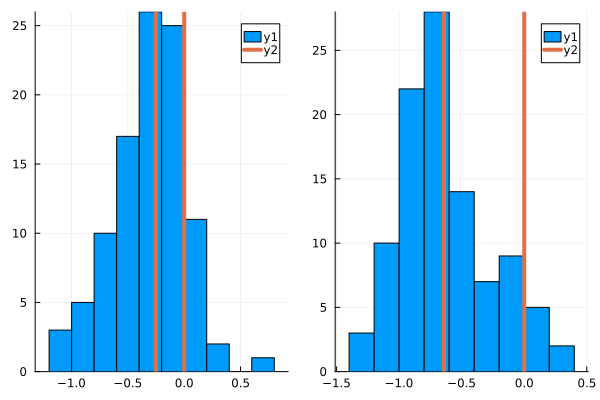

In [20]:
#=First cooked regression, repeated 100  times under the same parameters found=#
Random.seed!(12345)  
p1 = histogram(-0.251947 .+ (0.339996 .* randn(100)))
vline!([-0.251947, 0], linewidth = 4)
p2 = histogram(-0.642059 .+ (0.336388 .* randn(100)))
vline!([-0.642059, 0], linewidth = 4)
plot(p1, p2, layout = (1, 2))

## Simple Linear Regression

### Is there a relationship between `prestige` and `income`?

***Question:*** How common is zero in the 100 trials?

In [ ]:
#= 
Second cooked regression, repeated 100 
times under the same parameters found
=#
Random.seed!(12345)
p1 = histogram(-0.106654 .+ (0.175614 .* randn(100)))
vline!([-0.106654, 0], linewidth = 4)
p2 = histogram(0.169026 .+ (0.227732 .* randn(100)))
vline!([0.169026, 0], linewidth = 4)
plot(p1, p2, layout = (1, 2))

## Simple Linear Regression

### Is there a relationship between `prestige` and `income`?

Now we can answer this question:

In [21]:
mod = lm(@formula(prestige ~ income), dat)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

prestige ~ 1 + income

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  2.45657    5.19006    0.47    0.6384   -8.01018   12.9233
income       1.08039    0.107369  10.06    <1e-12    0.86386    1.29692
───────────────────────────────────────────────────────────────────────

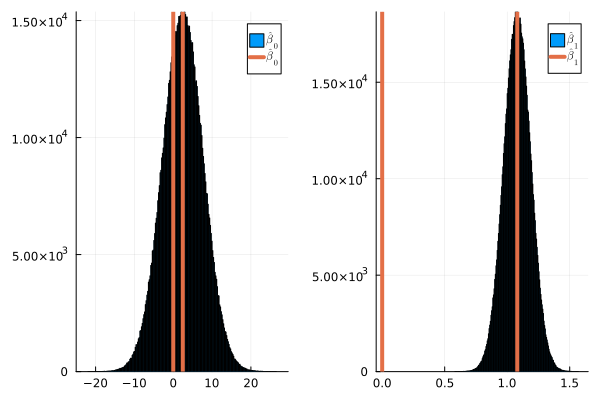

In [24]:
Random.seed!(12345)
p1 = histogram(2.45657 .+ (5.19006 .* randn(1000000)), label = latexstring("\\widehat{\\beta}_0"))
vline!([2.45657, 0], linewidth = 4, label = latexstring("\\widehat{\\beta}_0"))
p2 = histogram(1.08039 .+ (0.107369 .* randn(1000000)), label = latexstring("\\widehat{\\beta}_1"))
vline!([1.08039, 0], linewidth = 4, label = latexstring("\\widehat{\\beta}_1"))
plot(p1, p2, layout = (1, 2))

# Regression

## Simple Linear Regression

A few questions about `prestige`:

1. *Is there a relationship between `prestige` and `income`?* **Yes!**
1. How strong is the relationship between `prestige` and `income`?
1. Which variables are associated with `prestige`?
1. How can we accurately predict the prestige of professions not studied in this survey?
1. Is the relationship linear?
1. Is there a synergy among predictors?

## Simple Linear Regression

### How strong is the relationship between `prestige` and `income`?

There are three ways to study this question in the regression framework:

1. What is the magnitude of the effect?
1. Are there bounds for the effects? What are they?
1. What proportion of variation in prestige that may be explained by income?

## Simple Linear Regression

### How strong is the relationship between `prestige` and `income`?

What is the magnitude of the effect?

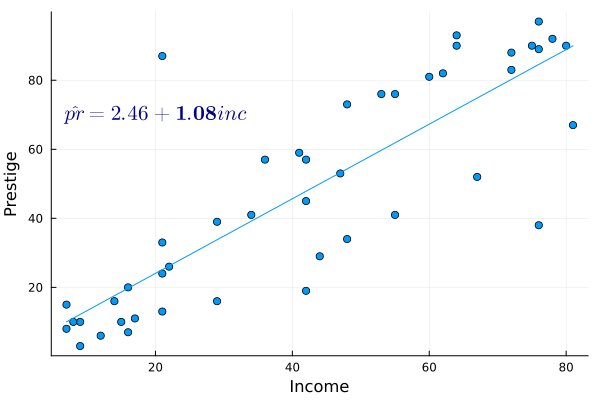

In [25]:
scatter(dat.income, dat.prestige, xlabel = "Income", 
    ylabel = "Prestige", smooth = :true, legend = false)
annotate!(20, 70, 
    latexstring("\\widehat{pr} = $(round(coef(mod)[1], digits = 2)) + \\textbf{$(round(coef(mod)[2], digits = 2))}inc"), :darkblue)

## Simple Linear Regression

### Assessing the accuracy of the whole model

$R^2$: Measure of goodness-of-fit.

It is widely used because it is between zero and one.

The proportion of the variability of $Y$ that is explained by modeling it using $X$.

It is defined as:

$$ \text{R}^2 \ = \ \dfrac{TSS - RSS}{TSS} \  = \ 1 - \dfrac{RSS}{TSS} $$

And the total sum of squares is defined as $TSS = \sum_i(y_i-\overline{y})^2$. 

The higher the $R^2$, the better.

In [26]:
r2(mod)

0.701911139847978

In [27]:
# Alternatively
TSS = sum((dat.prestige .- mean(dat.prestige)).^2)
RSS = sum((residuals(mod)).^2)
1 - RSS / TSS

0.701911139847978

## Simple Linear Regression

### Assessing the accuracy of the whole model

#### RMSE

The residual standard error (root mean squared error) is one of the best measures of the fit quality.

As we said in the second class, it is the criterium we use for most Supervised Machine Learning models.

It is defined as:

$$ \text{RMSE (or RSE)} \ = \ \sqrt{\dfrac{RSS}{n-2}} \ = \ \sqrt{\dfrac{\sum_i(y_i - \hat{y}_i)^2}{n-2}} $$

The lower, the better.

In [28]:
# MSE
RSS/dof_residual(mod)

302.855817097006

In [29]:
# RMSE
sqrt(RSS/dof_residual(mod))

17.402753147045615

## Simple Linear Regression

### How strong is the relationship between `prestige` and `income`?

What is the magnitude of the effect? + What proportion of variation in prestige that may be explained by income?

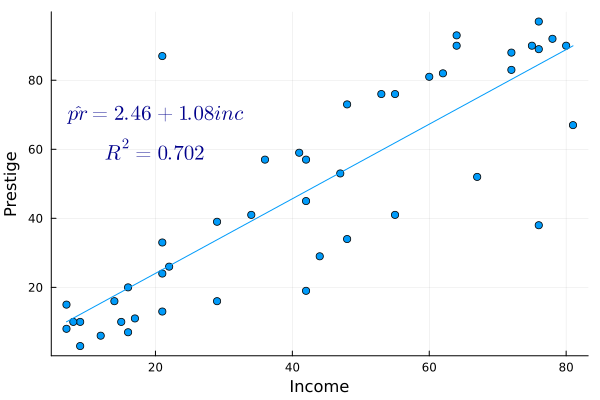

In [30]:
scatter(dat.income, dat.prestige, xlabel = "Income", 
    ylabel = "Prestige", smooth = :true, legend = false)
annotate!(20, 70, 
    latexstring("\\widehat{pr} = $(round(coef(mod)[1], digits = 2)) + $(round(coef(mod)[2], digits = 2))inc"), :darkblue)
annotate!(20, 60, 
    latexstring("R^2 = $(round(r2(mod), digits = 3))"), :darkblue)

## Simple Linear Regression

### How strong is the relationship between `prestige` and `income`?

Are there bounds for the effects? What are they?

The natural bound for our estimates is called `confidence interval`.

A 95% confidence interval looks like this:

$$ \hat{\beta}_k \pm 1.96 \times SE(\hat{\beta}_k) $$

You may use the number 2 instead of 1.96. This number would change depending on the confidence levels you choose: 95% = 1.96; 90% = 1.645; 99% = 2.807, etc..

In [31]:
mod

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

prestige ~ 1 + income

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  2.45657    5.19006    0.47    0.6384   -8.01018   12.9233
income       1.08039    0.107369  10.06    <1e-12    0.86386    1.29692
───────────────────────────────────────────────────────────────────────

In [32]:
round.(confint(mod), digits = 3)

2×2 Matrix{Float64}:
 -8.01   12.923
  0.864   1.297

## Simple Linear Regression

### How strong is the relationship between `prestige` and `income`?

What is the magnitude of the effect? + What proportion of variation in prestige that may be explained by income? + Effect bounds

About Confidence x Predition intervals, see [this](https://real-statistics.com/regression/confidence-and-prediction-intervals/).


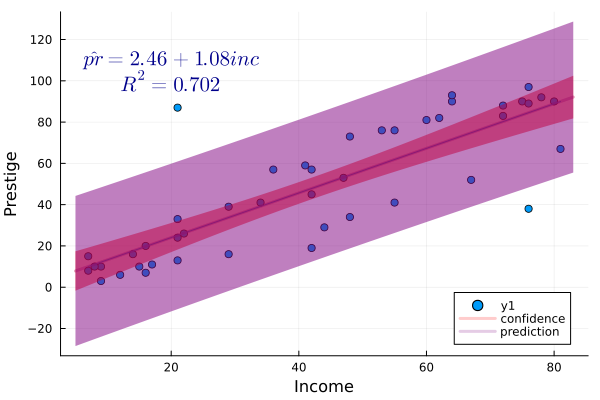

In [33]:
scatter(dat.income, dat.prestige, xlabel = "Income", 
    ylabel = "Prestige", smooth = :true, legend = :bottomright)
pred = DataFrame(income = minimum(dat.income .- 2):0.01:maximum(dat.income .+ 2));
pr = predict(mod, pred, interval = :confidence, level = 0.95)
plot!(pred.income, pr.prediction, label="confidence", linewidth=3, seriesalpha = 0.2,
        ribbon = (pr.prediction .- pr.lower, pr.upper .- pr.prediction), color = :red)
pr = predict(mod, pred, interval = :prediction, level = 0.95)
plot!(pred.income, pr.prediction, label="prediction", linewidth=3, seriesalpha = 0.2,
        ribbon = (pr.prediction .- pr.lower, pr.upper .- pr.prediction), color = :purple)
annotate!(20, 110, 
    latexstring("\\widehat{pr} = $(round(coef(mod)[1], digits = 2)) + $(round(coef(mod)[2], digits = 2))inc"), :darkblue)
annotate!(20, 100, 
    latexstring("R^2 = $(round(r2(mod), digits = 3))"), :darkblue)

# Regression

## Simple Linear Regression

A few questions about `prestige`:

1. *Is there a relationship between `prestige` and `income`?* **Yes!**
1. *How strong is the relationship between `prestige` and `income`?* **I'd say strong, but no baseline makes it harder for a good comparison**.
1. Which variables are associated with `prestige`?
1. How can we accurately predict the prestige of professions not studied in this survey?
1. Is the relationship linear?
1. Is there a synergy among predictors?

## Multiple Linear Regression

- We use multiple linear regression when we have multiple predictors for the same outcome variable.

- Let:
    + $y_i$ the variable we want to predict
    + $x_{ik}$ are the variables we will use to make the prediction.
    + $p$: number of predictors.
    + And if we assume a linear relationship, we want to find a slope $\beta_1$ and an intercept $\beta_0$.
    + $n$ the number of observations
    + $i$ a given observation
    + $k$ and $l$: given predictors
    + Thus:
    
$$ y_i \ = \ \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \cdots + \beta_px_{ip} + \varepsilon $$

### Estimation

- And the residual sum of squares is defined similarly as before, but we optimize over more parameters:

$$ \text{RSS} \ = \ \sum_ie_i^2 \ = \ \sum_i(y_i - \hat{\beta}_0 - \hat{\beta}_1x_{i1} - \cdots - \hat{\beta}_px_{ip})^2 $$

![reg](https://github.com/umbertomig/POLI175julia/blob/e0a55ce2350643ed200a482a3581479c6a8e3f74/img/fig4.png?raw=true)

## Multiple Linear Regression

Let us cook the following model:

$$ y_i = 1 + 5x_{1i} - 10.5 x_{2i} + \varepsilon_i $$

In [ ]:
Random.seed!(4321)
df = DataFrame(x1 = rand(100), x2 = rand(100))
df.y = 1 .+ 5 .* df.x1 .- 10.5 .* df.x2 .+ randn(100)
describe(df)

In [ ]:
pairplot(df)

## Multiple Linear Regression

A simple regression would give us:

In [ ]:
cookm = lm(@formula(y ~ x1 + x2), df)

Interpretation?

# Regression

## Simple Linear Regression

A few questions about `prestige`:

1. *Is there a relationship between `prestige` and `income`?* **Yes!**
1. *How strong is the relationship between `prestige` and `income`?* **I'd say strong, but no baseline makes it harder for a good comparison**.
1. Which variables are associated with `prestige`?
1. How can we accurately predict the prestige of professions not studied in this survey?
1. Is the relationship linear?
1. Is there a synergy among predictors?

# Regression

## Which variables are associated with `prestige`?

In [ ]:
pairplot(dat[:, Not("profession")])

# Regression

## Which variables are associated with `prestige`?

Let's try `income` and the `type` of the profession:

In [ ]:
mod2 = lm(@formula(prestige ~ income + type), dat)

# Regression

## Which variables are associated with `prestige`?

Is this model better than the previous one?

### F-Statistic

The F-Statistic tests whether at least one predictor is different from zero. The null hypothesis is:

$$ H_0: \ \beta_1 = \beta_2 = \cdots = \beta_p = 0 $$

The alternative hypothesis is:

$$ H_a: \ \exists k \in \{1, \cdots, p\}, \ s.t. \ \beta_k \neq 0 $$

The F-Statistic is equal to:

$$ \text{F} \ = \ \dfrac{\frac{TSS-RSS}{p}}{\frac{RSS}{n-p-1}} \ \sim \ F(p, n-p-1) $$

## Which variables are associated with `prestige`?

### F-Statistic

Why is this a good test? Because under the null hypothesis:

$$ \mathbb{E}\left[\dfrac{TSS-RSS}{p}\right] = \mathbb{E}\left[\dfrac{RSS}{n-p-1}\right] = \sigma^2 $$

And so, $F \approx 1$ under $H_0$.

In [ ]:
ftest(mod2.model)

## Which variables are associated with `prestige`?

But the best thing about F is that it allows us to compare two models, and check if we improved when moving from one to the other.

In this case, we can question: Are we improving our fitting when adding `type` of profession to our model?

## Which variables are associated with `prestige`?

### F-Statistic for model selection

Suppose we have $\{1, \cdots, l \}$ predictors, but we could add $\{l+1, \cdots, p \}$ extra predictors to our model.

We can test the *RSS of the restricted model* against the RSS of the full model*.

The null hypothesis is:

$$ H_0: \ \beta_{l+1} = \cdots = \beta_{p} = 0 $$

And the F-Stat:

$$ \text{F} \ = \ \dfrac{\frac{RSS_0-RSS}{p-l}}{\frac{RSS}{n-p-1}} \ \sim \ F(p-l, n-p-1) $$

In [ ]:
ftest(mod.model, mod2.model)

## Which variables are associated with `prestige`?

Your turn. Add `education` and study the result.

1. How to interpret it?
1. Run the F-test. Any improvements?
1. Answer the main Q: ***Which variables are associated with `prestige`?***

In [ ]:
# Your code here

# Questions?

# See you next class
